# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [4]:
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Count Through Data
record = 1
set = 1
# Create weatherPy dataframe
weather_df = pd.DataFrame({'City': cities})
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Temp'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
print('Beginning Data Retrieval')
print('-------------------------------')
# Loop through weather_df
for index, row in weather_df.iterrows():
    city = row['City']
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(url).json()
    try:
        print(f'Processing Record {record} of Set {set} | {city}')
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response["coord"]['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']["temp_max"]
        weather_df.loc[index, 'Humidity'] = response['main']["humidity"]
        weather_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        weather_df.loc[index, 'Wind Speed'] = response['wind']["speed"]
        weather_df.loc[index, 'Country'] = response['sys']["country"]
        weather_df.loc[index, 'Date'] = response['dt']
    except:
        print(f'City not found')
    record += 1
    if record == 51:
        record = 1
        set += 1
print('-------------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | russkaya polyana
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | dubrovnik
Processing Record 6 of Set 1 | den helder
Processing Record 7 of Set 1 | conde
Processing Record 8 of Set 1 | bukene
Processing Record 9 of Set 1 | oum hadjer
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | carballo
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | kadaura
Processing Record 19 of Set 1 | hovd
Processing Record 20 of Set 1 | constantine
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set 

Processing Record 44 of Set 4 | tonj
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | kholodnyy
Processing Record 47 of Set 4 | kudahuvadhoo
Processing Record 48 of Set 4 | praya
Processing Record 49 of Set 4 | clifton
Processing Record 50 of Set 4 | sibu
Processing Record 1 of Set 5 | teya
Processing Record 2 of Set 5 | pangody
Processing Record 3 of Set 5 | tupik
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | dumas
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | yabrud
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | winnemucca
Processing Record 10 of Set 5 | gondar
Processing Record 11 of Set 5 | zavallya
Processing Record 12 of Set 5 | kaitangata
Processing Record 13 of Set 5 | machacamarca
Processing Record 14 of Set 5 | ler
Processing Record 15 of Set 5 | barentsburg
City not found
Processing Record 16 of Set 5 | sitka
Processing Record 17 of Set 5 | hami
Processing Record 18 of Set 5 | bon

Processing Record 37 of Set 8 | sainte-rose
Processing Record 38 of Set 8 | mbandaka
Processing Record 39 of Set 8 | codrington
Processing Record 40 of Set 8 | anadyr
Processing Record 41 of Set 8 | vaitupu
City not found
Processing Record 42 of Set 8 | price
Processing Record 43 of Set 8 | moss vale
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | pouembout
Processing Record 46 of Set 8 | kikwit
Processing Record 47 of Set 8 | dzhusaly
City not found
Processing Record 48 of Set 8 | santa marta
Processing Record 49 of Set 8 | bage
Processing Record 50 of Set 8 | key west
Processing Record 1 of Set 9 | ijaki
City not found
Processing Record 2 of Set 9 | balkanabat
Processing Record 3 of Set 9 | turayf
Processing Record 4 of Set 9 | seoul
Processing Record 5 of Set 9 | makaryev
Processing Record 6 of Set 9 | haibowan
City not found
Processing Record 7 of Set 9 | namibe
Processing Record 8 of Set 9 | cayenne
Processing Record 9 of Set 9 | jiddah
City not found
Proc

Processing Record 29 of Set 12 | krasnoselkup
Processing Record 30 of Set 12 | kieta
Processing Record 31 of Set 12 | agadir
Processing Record 32 of Set 12 | humenne
Processing Record 33 of Set 12 | luderitz
Processing Record 34 of Set 12 | ulaanbaatar
Processing Record 35 of Set 12 | arlit
Processing Record 36 of Set 12 | altamira
Processing Record 37 of Set 12 | shestakovo
Processing Record 38 of Set 12 | izhma
Processing Record 39 of Set 12 | madang
Processing Record 40 of Set 12 | buin
Processing Record 41 of Set 12 | vostok
Processing Record 42 of Set 12 | wageningen
Processing Record 43 of Set 12 | yanliang
Processing Record 44 of Set 12 | buala
Processing Record 45 of Set 12 | garissa
Processing Record 46 of Set 12 | haines junction
Processing Record 47 of Set 12 | marzuq
Processing Record 48 of Set 12 | issoudun
Processing Record 49 of Set 12 | ayan
Processing Record 50 of Set 12 | ruidoso
Processing Record 1 of Set 13 | itabira
Processing Record 2 of Set 13 | camacha
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df.count()

City          629
Lat           629
Lng           629
Max Temp      629
Humidity      629
Cloudiness    629
Wind Speed    629
Country       629
Date          629
dtype: int64

In [7]:
weather_df.to_csv('city_data.csv')

In [10]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,russkaya polyana,49.42,31.92,296.17,50,89,2.67,UA,1595597547
1,pisco,-13.7,-76.22,288.71,82,20,1.5,PE,1595597547
2,atuona,-9.8,-139.03,299.05,82,32,9.22,PF,1595597548
3,sao joao da barra,-21.64,-41.05,298.15,65,20,5.1,BR,1595597548
4,dubrovnik,42.65,18.09,300.15,61,0,4.6,HR,1595597548
...,...,...,...,...,...,...,...,...,...
624,aras,42.56,-2.36,301.15,34,82,3.1,ES,1595597621
625,tres rios,-22.12,-43.21,294.82,65,0,2.1,BR,1595597621
626,iwanai,42.97,140.51,289.72,89,100,1.66,JP,1595597621
627,myaundzha,63.05,147.19,289.03,64,0,2.34,RU,1595597621


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
hhcities = weather_df.loc[weather_df["Humidity"] >= 100]
hhcities

   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [98]:
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

## Latitude vs. Temperature Plot

In [99]:
# Create new database for Scatter Plot
lat_vs_temp = weather_df[["Lat", "Max Temp"]]

# Turn values in "Max Temp" into fahrenheit instead of calvin
lat_vs_temp["Max Temp (F)"] = lat_vs_temp["Max Temp"] * 9/5 - 459.67

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


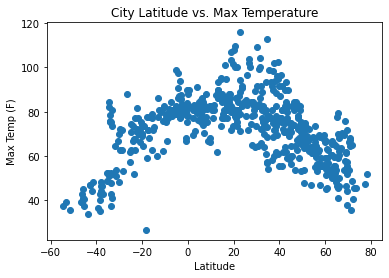

In [100]:
lat_vs_temp["Lat"] = pd.to_numeric(lat_vs_temp["Lat"])
lat_vs_temp["Max Temp"] = pd.to_numeric(lat_vs_temp["Max Temp"])
x_axis = lat_vs_temp["Lat"]
y_axis = lat_vs_temp["Max Temp (F)"]
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis)

## Latitude vs. Humidity Plot

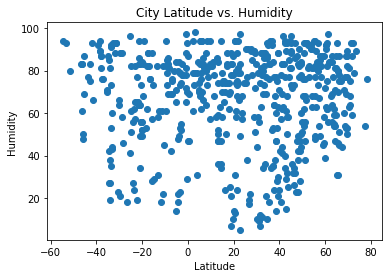

In [101]:
lat_vs_hum = weather_df[["Lat", "Humidity"]]
x_axis = lat_vs_hum["Lat"]
y_axis = lat_vs_hum["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis)

## Latitude vs. Cloudiness Plot

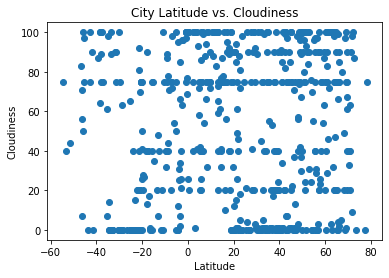

In [102]:
lat_vs_cloud = weather_df[["Lat", "Cloudiness"]]
lat_vs_cloud.dtypes
x_axis = lat_vs_cloud["Lat"]
y_axis = lat_vs_cloud["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis)

## Latitude vs. Wind Speed Plot

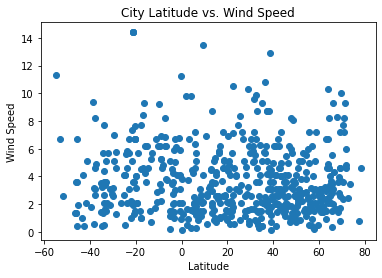

In [103]:
lat_vs_wind = weather_df[["Lat", "Wind Speed"]]
x_axis = lat_vs_wind["Lat"]
y_axis = lat_vs_wind["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis)

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots

In [9]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression